<a href="https://colab.research.google.com/github/rangaraju1/ML-Projects/blob/main/Project_01_Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/deeplearningoceanUdemy/Neural Networks for Regression

/content/drive/MyDrive/deeplearningoceanUdemy/Neural Networks for Regression


In [6]:
data = pd.read_csv("Regression_Data.csv")

In [7]:
data

,Ind_Data,Dependent_Data
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [8]:
X = data['Ind_Data'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y = data['Dependent_Data'].values.reshape(-1,1)
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

## Visualize the data

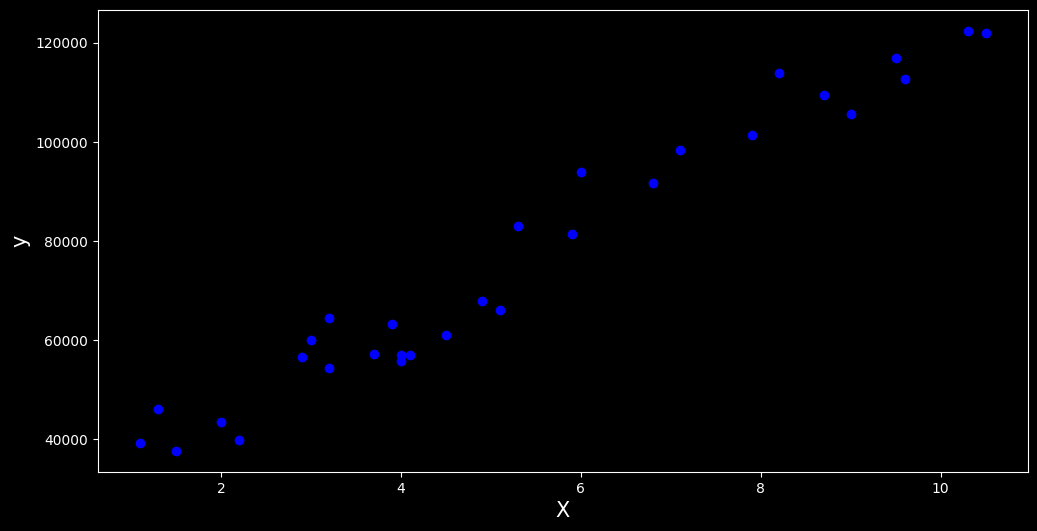

In [10]:
plt.figure(figsize =(12,6))
plt.scatter(X, y,color = 'b')
plt.ylabel('y', fontsize = 15)
plt.xlabel('X', fontsize = 15);

# Transforming to torch tensors

In [11]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [12]:
X

tensor([[ 1.1000],
        [ 1.3000],
        [ 1.5000],
        [ 2.0000],
        [ 2.2000],
        [ 2.9000],
        [ 3.0000],
        [ 3.2000],
        [ 3.2000],
        [ 3.7000],
        [ 3.9000],
        [ 4.0000],
        [ 4.0000],
        [ 4.1000],
        [ 4.5000],
        [ 4.9000],
        [ 5.1000],
        [ 5.3000],
        [ 5.9000],
        [ 6.0000],
        [ 6.8000],
        [ 7.1000],
        [ 7.9000],
        [ 8.2000],
        [ 8.7000],
        [ 9.0000],
        [ 9.5000],
        [ 9.6000],
        [10.3000],
        [10.5000]])

## Create Neural Network Model

In [13]:
model = nn.Sequential(
          nn.Linear(1,1),
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

# Setting the Parameters

In [14]:
learningRate = 0.001
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)   # SGD = Stochastic Gradient Descent

# Training the Neural Network

In [15]:
epochs = 5001  # Number of times we pass the data to the neural network.
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model(X)
    loss = lossfunc(ypred,y)
    losses[epoch] = loss

    # Back Propagation

    optimizer.zero_grad()     # Initializing the gradient to zero. zero_grad() restarts looping without losses from the last
                              # step if you use the gradient method for decreasing the error (or losses).If you do not use
                              #zero_grad() the loss will increase not decrease as required. Gradients accumulate with every backprop.

    loss.backward()           # Calculate Gradient of all parameters.

    optimizer.step()          # This is used to update the parameters so that error could be reduced.

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

epochs : 0 loss :  6503502336.00
epochs : 100 loss :  144402928.00
epochs : 200 loss :  135221456.00
epochs : 300 loss :  126786328.00
epochs : 400 loss :  119035736.00
epochs : 500 loss :  111914016.00
epochs : 600 loss :  105370184.00
epochs : 700 loss :  99357352.00
epochs : 800 loss :  93832440.00
epochs : 900 loss :  88755920.00
epochs : 1000 loss :  84091272.00
epochs : 1100 loss :  79805160.00
epochs : 1200 loss :  75866848.00
epochs : 1300 loss :  72248104.00
epochs : 1400 loss :  68923024.00
epochs : 1500 loss :  65867736.00
epochs : 1600 loss :  63060352.00
epochs : 1700 loss :  60480784.00
epochs : 1800 loss :  58110556.00
epochs : 1900 loss :  55932648.00
epochs : 2000 loss :  53931468.00
epochs : 2100 loss :  52092672.00
epochs : 2200 loss :  50403092.00
epochs : 2300 loss :  48850600.00
epochs : 2400 loss :  47424116.00
epochs : 2500 loss :  46113340.00
epochs : 2600 loss :  44908952.00
epochs : 2700 loss :  43802312.00
epochs : 2800 loss :  42785452.00
epochs : 2900 loss

In [16]:
ypred

tensor([[ 33779.8477],
        [ 35755.2266],
        [ 37730.6016],
        [ 42669.0469],
        [ 44644.4219],
        [ 51558.2461],
        [ 52545.9336],
        [ 54521.3125],
        [ 54521.3125],
        [ 59459.7539],
        [ 61435.1328],
        [ 62422.8203],
        [ 62422.8203],
        [ 63410.5078],
        [ 67361.2656],
        [ 71312.0156],
        [ 73287.3906],
        [ 75262.7734],
        [ 81188.9062],
        [ 82176.5938],
        [ 90078.1016],
        [ 93041.1719],
        [100942.6797],
        [103905.7422],
        [108844.1875],
        [111807.2578],
        [116745.6953],
        [117733.3906],
        [124647.2109],
        [126622.5859]], grad_fn=<AddmmBackward0>)

In [17]:
ypred.detach()

tensor([[ 33779.8477],
        [ 35755.2266],
        [ 37730.6016],
        [ 42669.0469],
        [ 44644.4219],
        [ 51558.2461],
        [ 52545.9336],
        [ 54521.3125],
        [ 54521.3125],
        [ 59459.7539],
        [ 61435.1328],
        [ 62422.8203],
        [ 62422.8203],
        [ 63410.5078],
        [ 67361.2656],
        [ 71312.0156],
        [ 73287.3906],
        [ 75262.7734],
        [ 81188.9062],
        [ 82176.5938],
        [ 90078.1016],
        [ 93041.1719],
        [100942.6797],
        [103905.7422],
        [108844.1875],
        [111807.2578],
        [116745.6953],
        [117733.3906],
        [124647.2109],
        [126622.5859]])

# Plotting Loss Vs Epochs

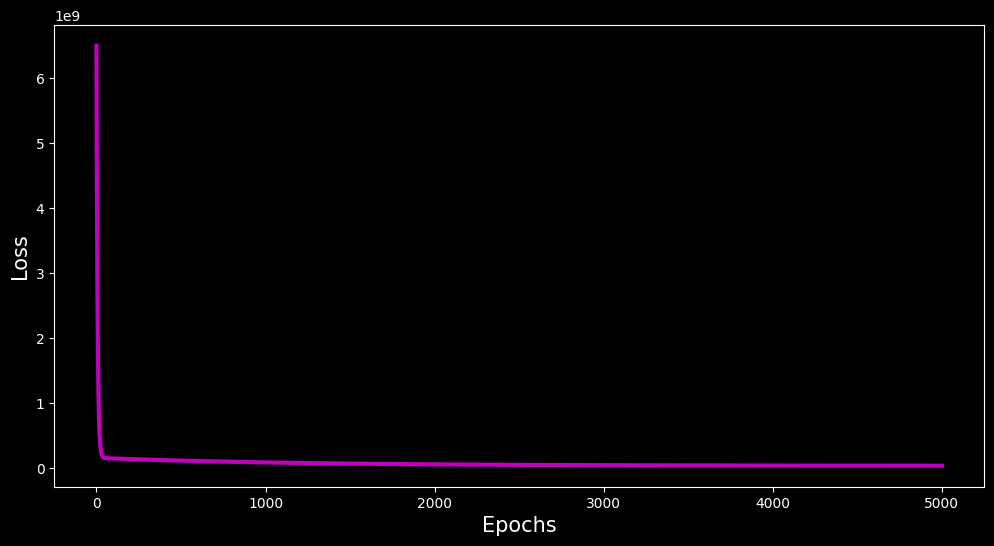

In [18]:
plt.figure(figsize =(12,6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw = 3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

# Weight and Bias of the Trained Model

In [19]:
print(model[0].weight.detach().numpy())
print(model[0].bias.detach().numpy())

[[9876.706]]
[22916.49]


# Creating a test data

In [20]:
test_data = np.linspace(0,11,30).reshape(-1,1)

In [21]:
X_test = torch.tensor(test_data, dtype = torch.float32)

In [22]:
yt = model(X_test)

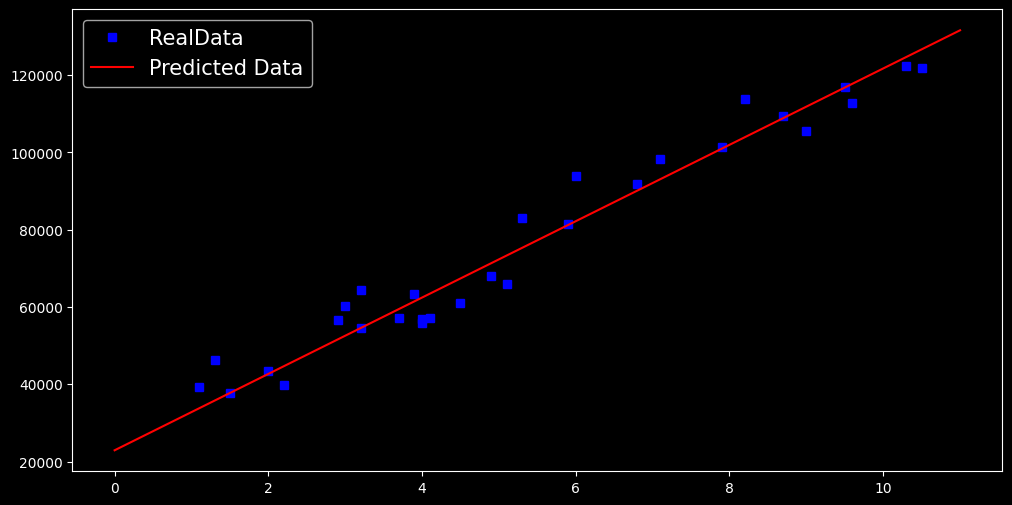

In [23]:
plt.figure(figsize =(12,6))
plt.plot(X, y,'bs',label = 'RealData')
plt.plot(X_test, yt.detach(),'r', label = 'Predicted Data')
plt.legend(fontsize = 15)
plt.show()

# Check the Performance of the Model

In [24]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, yt.detach())))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y, yt.detach())))
print('R2:', metrics.r2_score(y, yt.detach()))

RMSE: 9997.57688471685
MAE: 92.34516954633668
R2: 0.8624203095164156
